In [19]:
import os
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import os
from datetime import datetime
current_datetime = datetime.now()
current_date_string = current_datetime.strftime("%Y-%m-%d")

In [20]:
# automatically select files
paths=[]
n_M0=0; n_noM0=0
# detect folders on path
folders = [folder for folder in os.listdir() if folder.endswith(('_noM0','_M0'))]
for folder in folders:
    # select files within folder
    files = [file for file in sorted(os.listdir(folder)) if file.startswith('results') and file.endswith('.xlsx')]
    if len(files)==1:
        file = files[0]
        print('File',file,'found in folder',folder)
    elif len(files)>1.5:
        file = files[-1]
        print('File',file,'found in folder',folder,'(last file alphabetically selected from multiple files)')
    else:
        print('No file found in',folder)
    paths+=[os.path.join(folder,file)]
    # count instances of M0 or noM0 in folder names
    if folder.endswith('_noM0'):
        n_noM0+=1
    if folder.endswith('_M0'):
        n_M0+=1
# automatically select data type
if n_noM0>0.5 and n_M0>0.5:
    data_type='M0+noM0'
    print('Data type =',data_type)
elif n_M0>0.5:
    data_type='M0-only'
    print('Data type =',data_type)
else:
    print('error selecting data type')
    
### Or manually input filename
# paths = ['250203_DC-2011-2_HSO4_noM0/results_2025-02-08.xlsx',
#          '250131_DC-2011-2_HSO4_M0/results_2025-02-08.xlsx']
### Or manually input data type
# data_type = 'M0-only'
# data_type = 'M0+noM0'

data=pd.DataFrame()
data_merged = pd.DataFrame(columns=['sample_name'])

for path in paths:
    data = pd.concat([data, pd.read_excel(path,sheet_name='Referenced deltas summary')],ignore_index=True)
    print('Data loaded',path)
    
# join data on sample name column, adding _basepeak as column suffix
for bp in data['basepeak'].unique():
    data_bp = data[data['basepeak']==bp].dropna(axis=1,how='all')
    data_bp.columns = ['sample_name']+[ col+'_'+bp for col in data_bp.columns if col not in 'sample_name']
    data_merged = pd.merge(data_merged,data_bp, on='sample_name',how='outer') 
     
# sort and display
data_merged = data_merged.sort_values('sample_name').set_index('sample_name',drop=True)

# drop
if True:
    # tuple of sample_names to drop
    to_drop= ()
    data_merged=data_merged.loc[[row for row in data_merged.index if row not in to_drop]]

# rename samples to fit in alphabetical order (DC-01 not DC1)
newnames=[]
for name in data_merged.index:
    if (name.startswith('DC')) and not (name.startswith('DC-')):
        if len(name)==3:
            newname = 'DC-0'+name[2]
        else:
            newname = 'DC-'+name[2:]
    else:
        newname=name
    if name.startswith('DC-'):
        if len(name)==4:
            newname = 'DC-0'+name[3]
        else:
            newname = name
    newnames+=[newname]
    
data_merged.index=newnames
# sort rows alphabetically
data_merged = data_merged.loc[sorted(data_merged.index)]

data_merged[[col for col in data_merged.columns if col.startswith('mean_')]]*1e3

File results_2025-02-08.xlsx found in folder 250131_DC-2011-2_HSO4_M0 (last file alphabetically selected from multiple files)
File results_2025-02-08.xlsx found in folder 250203_DC-2011-2_HSO4_noM0 (last file alphabetically selected from multiple files)
Data type = M0+noM0
Data loaded 250131_DC-2011-2_HSO4_M0/results_2025-02-08.xlsx
Data loaded 250203_DC-2011-2_HSO4_noM0/results_2025-02-08.xlsx


,mean_d17O_M0,mean_d18O_M0,mean_d33S_M0,mean_d34S_M0,mean_d17O_34S,mean_d18O_34S,mean_d33S_34S,mean_d17O18O_34S,mean_d18O18O_34S,mean_d18O34S_34S,mean_d33S18O_34S,mean_d34S17O_34S,mean_d36S_34S
DC-01,-11.5,-23.5,8.9,16.7,-24.7,-34.6,-5.5,-56.9,-64.3,-26.0,-34.3,-12.2,12.5
DC-03,-10.5,-22.9,10.0,16.0,-23.1,-32.2,-4.4,-49.3,-64.1,-24.6,-34.1,-9.5,10.3
DC-06,-11.7,-23.7,9.9,17.3,-23.9,-33.3,-4.1,-44.8,-61.8,-24.0,-35.4,-10.7,11.6
DC-09,-10.3,-22.4,9.2,16.4,-19.9,-27.9,-1.1,-61.0,-54.9,-23.1,-33.2,-9.8,0.1
DC-12,-8.6,-22.0,8.2,14.2,-18.0,-21.4,-0.9,-52.6,-60.1,-23.7,-30.7,-8.4,5.7
DC-16,-7.9,-18.3,6.5,10.0,-10.1,-14.2,1.1,-28.4,-43.3,-20.3,-25.8,-6.6,2.4
DC-18-20,-8.1,-20.4,5.1,7.3,-2.5,-0.8,8.7,-67.8,-32.2,-16.4,-22.4,-4.5,-23.8
DC-21-24,-6.0,-12.2,6.0,9.4,-4.6,-11.6,4.3,-48.8,-23.6,-10.4,-17.2,-1.6,-16.9
DC-27-28,-5.5,-15.2,5.0,7.9,2.4,-0.4,11.6,-54.8,-12.9,-7.1,-14.3,3.3,-37.7
DC-30,-5.3,-14.2,6.0,11.3,-8.8,-17.1,3.1,-54.3,-31.6,-11.8,-21.6,-4.2,-13.2


In [21]:
disp = data_merged.loc[[row for row in data_merged.index if row.startswith(('USGS','VS','S1','S2'))],[col for col in data_merged.columns if col.startswith('mean_')]]*1e3
disp.head(8)

# go back up and drop standards from analysis if any are outlying

,mean_d17O_M0,mean_d18O_M0,mean_d33S_M0,mean_d34S_M0,mean_d17O_34S,mean_d18O_34S,mean_d33S_34S,mean_d17O18O_34S,mean_d18O18O_34S,mean_d18O34S_34S,mean_d33S18O_34S,mean_d34S17O_34S,mean_d36S_34S
S1-1,-2.5,-9.1,13.2,8.7,-7.1,-7.5,7.1,-21.7,-28.1,-9.9,-4.7,-1.1,5.2
S1-2,-0.9,-9.9,13.4,9.3,-8.1,-10.0,6.4,-29.2,-27.5,-11.1,-7.1,-0.6,3.5
S2-1,0.2,-7.0,20.3,17.8,-14.5,-16.8,3.8,-25.3,-29.6,-7.5,-8.5,0.2,15.0
S2-2,-2.6,-6.6,19.9,18.8,-16.0,-16.4,3.9,-38.9,-32.9,-9.5,-6.3,-0.2,11.2
VS-1,-1.9,-2.3,0.5,-1.2,6.0,9.6,3.7,2.4,-4.0,-5.5,-2.8,-3.0,-4.3
VS-2,-1.0,-1.7,-0.6,-1.0,2.6,8.2,2.7,0.9,-7.7,-5.0,-1.1,-1.5,-5.0


## Calibration

In [22]:
standards = ['S1','S2']

# mean, std
stds = data_merged.loc[data_merged.index.str.startswith(tuple(standards)),
                       [col for col in data_merged.columns if col.startswith('mean')]]
stds = stds.set_index(stds.index.str.split('-').str[0])
stds_mean = stds.groupby(stds.index).mean()
stds_std = stds.groupby(stds.index).std()
for row in stds_std.index:
    if len(stds_std.loc[row].dropna())==0:
        for col in stds_std.columns:
            stds_std.loc[row,col]=0

# propogate errors
def errprop(series_std):
    return np.sum(series_std**2,axis=0)**0.5/2
stds_err = data_merged.loc[data_merged.index.str.startswith(tuple(standards)),
                       [col for col in data_merged.columns if col.startswith('err')]]
stds_err = stds_err.set_index(stds_err.index.str.split('-').str[0])
stds_err = stds_err.groupby(stds_err.index).apply(errprop)

# select max error
cols = stds_err.columns
stds_err.columns=stds.columns
stds_errmax = np.maximum( stds_err , stds_std )
stds_errmax.columns=cols

stds_stats = pd.merge(stds_mean,stds_errmax, left_index=True, right_index=True).loc[standards]

stds_stats*1e3

,mean_d17O_M0,mean_d18O_M0,mean_d33S_M0,mean_d34S_M0,mean_d17O_34S,mean_d18O_34S,mean_d33S_34S,mean_d17O18O_34S,mean_d18O18O_34S,mean_d18O34S_34S,...,err_d34S_M0,err_d17O_34S,err_d18O_34S,err_d33S_34S,err_d17O18O_34S,err_d18O18O_34S,err_d18O34S_34S,err_d33S18O_34S,err_d34S17O_34S,err_d36S_34S
S1,-1.7,-9.5,13.3,9.0,-7.6,-8.8,6.8,-25.5,-27.8,-10.5,...,0.5,0.6,1.8,0.5,5.3,1.3,0.8,1.7,0.8,1.2
S2,-1.2,-6.8,20.1,18.3,-15.3,-16.6,3.8,-32.1,-31.3,-8.5,...,0.7,1.0,0.6,0.4,9.7,2.4,1.4,1.6,0.7,2.7


In [23]:
ref_fn=[fn for fn in os.listdir() if fn.startswith('references_')][0]
print('References file', ref_fn)

refs = pd.read_excel(ref_fn,index_col='sample_name')/1e3
refs = refs[refs.index.isin(stds_stats.index)].loc[standards]

# rename columns
cols=np.array(refs.columns)
for i,col in enumerate(cols):
    if '/' in col:
        col = col.replace('/','_')
    else:
        col=col+'_M0'
    cols[i]=col
refs.columns=cols

refs*1e3

References file references_sulphate.xlsx


,mean_d33S_M0,mean_d34S_M0,mean_d17O_M0,mean_d18O_M0,mean_d33S_34S,mean_d17O_34S,mean_d18O_34S,mean_d36S_34S,mean_d18O34S_34S,mean_d33S18O_34S,...,err_d17O_M0,err_d18O_M0,err_d33S_34S,err_d17O_34S,err_d18O_34S,err_d36S_34S,err_d18O34S_34S,err_d33S18O_34S,err_d34S17O_34S,err_d18O18O_34S
sample_name,,,,,,,,,,,,,,,,,,,,,
S1,14.8,10.3,3.6,0.5,4.5,-6.6,-9.6,9.2,0.5,5.0,...,0.6,0.4,0.3,0.6,0.4,0.4,0.4,0.3,0.6,0.8
S2,22.4,21.5,4.8,2.9,0.9,-16.3,-18.2,19.0,NaN,NaN,...,0.5,0.2,0.3,0.6,0.3,0.5,NaN,NaN,NaN,NaN


Matched columns ['mean_d33S_M0', 'mean_d34S_M0', 'mean_d17O_M0', 'mean_d18O_M0', 'mean_d33S_34S', 'mean_d17O_34S', 'mean_d18O_34S', 'mean_d36S_34S', 'mean_d18O34S_34S', 'mean_d33S18O_34S', 'mean_d34S17O_34S', 'mean_d18O18O_34S']

No calibration data for ['mean_d17O18O_34S'] These columns are discarded.


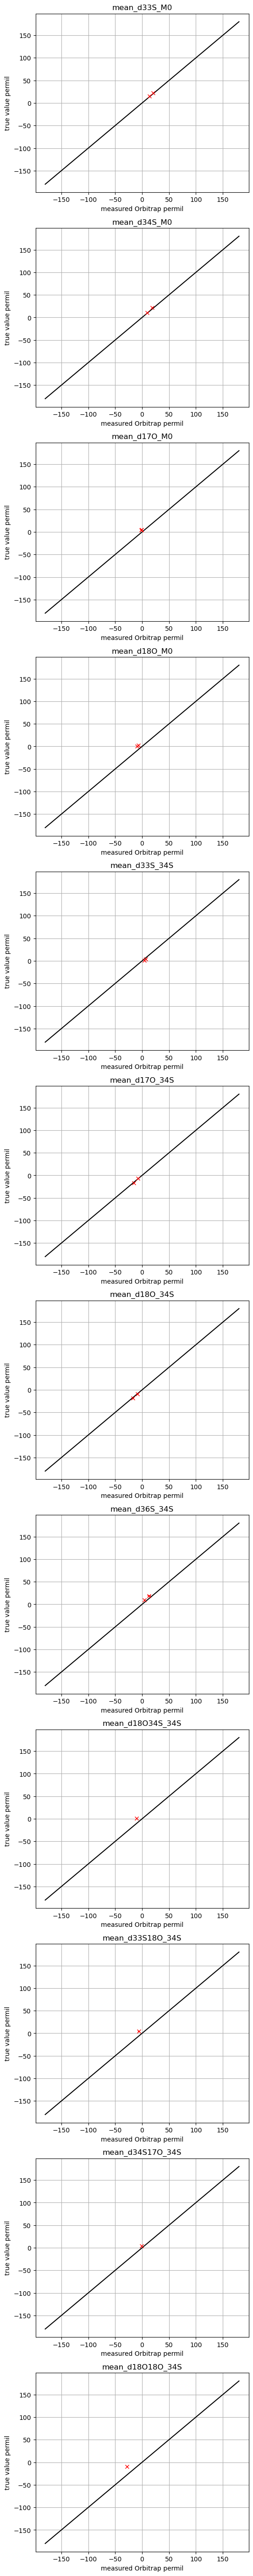

In [24]:
# plots
columns = [col for col in refs.columns if (col.startswith('mean_')) and (col in stds_stats.columns)]
print('Matched columns',columns)
not_columns = [col for col in stds_stats.columns if (col.startswith('mean_')) and not (col in columns)]
if len(not_columns)>0.5:
    print('\nNo calibration data for', not_columns,'These columns are discarded.')
    
fig,ax = plt.subplots(len(columns),figsize=[6,len(columns)*6])

for i, col in enumerate(columns):
    
    ax[i].plot([-180,180],[-180,180],c='k')
    ax[i].grid()
    ax[i].set_xlabel('measured Orbitrap permil')
    ax[i].set_ylabel('true value permil')
    ax[i].set_title(col)
    ax[i].errorbar(stds_stats[col]*1e3,refs[col]*1e3,
                   xerr=stds_stats['err'+col[4:]]*1e3,yerr=refs['err'+col[4:]]*1e3,
                   c='r',linestyle='none',marker='x')
    

# Calibration calculation


$ y + 1 = (x + 1 )^b (a+1)$  
for  
$y=\delta_{true} ; x=\delta_{meas}$

The scale-shift $a$ and scale-contraction $b$ for each isotopologue are given by  

$b= \frac{log(y_1+1)-log(y_2+1)}{log(x_1+1)-log(x_2+1)}$,   

$ b_{err}   = b*\frac{\sqrt{{\sigma_{x_1}}^2 +{\sigma_{x_2}}^2}}{log(x_1+1)-log(x_2+1)} $

and  
$a= \frac{y_1 +1 }{(1+x_1)^b}-1$  

$a_{err} = b\sigma_{x_1} + \sigma_b x_1$
 
For reference materials 1 and 2


Scale contraction $\bar{b}$ is calculated as the weighted mean for all isotopologues in the experiment:

$ \bar{b} = \frac{1}{w_{15N}+w_{17O}+w_{18O}}(w_{15N}b_{15N} + w_{17O}b_{17O} + w_{18O}b_{18O}) $

with weights $w$ equal to $\frac{1}{\sigma^2_b}$ for uncertainty $\sigma_b$ 

In [25]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### M0 CALIBRATION
# df for calibration coeffcients
df_ab=pd.DataFrame(index=['a','a_err','b','b_err'])

bp='M0'
x_data=stds_stats[[col for col in stds_stats.columns if (col in refs.columns) & (col.endswith(bp))]]
y_data=refs[x_data.columns]
isotopologues = [col.split('_')[1][1:] for col in x_data.columns if col.startswith('mean_')]
print('M0 isotopologues identified:',isotopologues, '\nBasepeak =',bp)

for iso in isotopologues:
    # calculate b (scale contraction)
    # load standards
    x_vals=[]; y_vals=[]; errors=[]
    y_data_clean=y_data.dropna(subset=['mean_d'+iso+'_'+bp])
    x_data_clean=x_data.dropna(subset=['mean_d'+iso+'_'+bp])
    for standard in y_data_clean.index:
        # linear calibration with log(1+d)
        x_vals.append(np.log(1 + x_data_clean.loc[standard,'mean_d'+iso+'_'+bp]))
        y_vals.append(np.log(1 + y_data_clean.loc[standard,'mean_d'+iso+'_'+bp]))
        # standard errors on x
        err = stds_stats.loc[standard, 'err_d'+iso+'_'+bp]
        errors.append(err)
    x_vals = np.array(x_vals)  
    y_vals = np.array(y_vals)
    errors = np.array(errors)
    # Perform linear regression 100 times
    nn=1000
    slopes=[]
    for _ in range(nn):
        x_vals_pet = np.random.normal(loc=x_vals,scale=errors).reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(x_vals_pet, y_vals)
        slopes.append(reg.coef_[0])
    slope=np.mean(slopes)
    err_slope=np.std(slopes)

    print('Linear regression ('+str(nn)+' times) for',iso,'using',y_data_clean.index.tolist())
    print('Measured (x) values',x_vals,'True (y) values',y_vals)

    # store values in df_ab
    df_ab.loc['b',iso]=slope
    df_ab.loc['b_err',iso]=err_slope
    
# weighted average b - using 1/err^2 as weighting
errs=df_ab.loc['b_err']
weights =errs**-2
vals = df_ab.loc['b']
df_ab.loc['b','av'] = np.sum(weights*vals) / np.sum(weights) 
df_ab.loc['b_err','av'] =  np.sqrt(1/np.sum(weights))
                                                      
#  calculate a using average b at standard 0 (the most similar to the samples)
for iso in isotopologues:
    df_ab.loc['a',iso] = (refs.loc[standards[0],'mean_d'+iso+'_'+bp]+1) / (stds_stats.loc[standards[0],'mean_d'+iso+'_'+bp]+1)**df_ab.loc['b','av'] -1
    df_ab.loc['a_err',iso] = stds_stats.loc[standards[0],'err_d'+iso+'_'+bp]*df_ab.loc['b','av'] + df_ab.loc['b_err','av']*stds_stats.loc[standards[0],'mean_d'+iso+'_'+bp]

# save as df_M0
df_ab_M0=df_ab.copy()
print('Calibration coefficients M0:\n',df_ab_M0)



### no-M0 CALIBRATION
df_ab=pd.DataFrame(index=['a','a_err','b','b_err'])
bp='34S'
x_data=stds_stats[[col for col in stds_stats.columns if (col in refs.columns) & (col.endswith(bp))]]
y_data=refs[x_data.columns]
isotopologues = [col.split('_')[1][1:] for col in x_data.columns if col.startswith('mean_')]
print('\n\nno-M0 isotopologues identified:',isotopologues, '\nBasepeak =',bp)

# identify the isotopologues for which regression is possible
isotopologues_1pt=[]
for iso in isotopologues:
    df = y_data['mean_d'+iso+'_'+bp].dropna()
    if len(df)==1:
        isotopologues_1pt.append(iso)
print('Isotopologues with a single calibration point:',isotopologues_1pt)
isotopologues_multiple_pts = [iso for iso in isotopologues if iso not in isotopologues_1pt]
print('Isotopologues with multiple calibration points:',isotopologues_multiple_pts)

for iso in isotopologues_multiple_pts:
    # calculate b (scale contraction)
    # load standards
    x_vals=[]; y_vals=[]; errors=[]
    y_data_clean=y_data.dropna(subset=['mean_d'+iso+'_'+bp])
    x_data_clean=x_data.dropna(subset=['mean_d'+iso+'_'+bp])
    for standard in y_data_clean.index:
        # linear calibration with log(1+d)
        x_vals.append(np.log(1 + x_data_clean.loc[standard,'mean_d'+iso+'_'+bp]))
        y_vals.append(np.log(1 + y_data_clean.loc[standard,'mean_d'+iso+'_'+bp]))
        # standard errors on x
        err = stds_stats.loc[standard, 'err_d'+iso+'_'+bp]
        errors.append(err)
    x_vals = np.array(x_vals)  
    y_vals = np.array(y_vals)
    errors = np.array(errors)
    # Perform linear regression many times
    nn=1000
    slopes=[]
    for _ in range(nn):
        x_vals_pet = np.random.normal(loc=x_vals,scale=errors).reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(x_vals_pet, y_vals)
        slopes.append(reg.coef_[0])
    # use median and IQR to avoid extreme, non-linear behaviour
    slope=np.median(slopes)
    err_slope=np.percentile(slopes,75)-np.percentile(slopes,25)
    
    print('Linear regression ('+str(nn)+' times) for',iso,'using',y_data_clean.index.tolist())
    print('Measured (x) values',x_vals,'True (y) values',y_vals)

    # store values in df_ab
    df_ab.loc['b',iso]=slope
    df_ab.loc['b_err',iso]=err_slope
      
# weighted average b - using 1/err^2 as weighting
errs=df_ab.loc['b_err']
weights =errs**-2
vals = df_ab.loc['b']
df_ab.loc['b','av'] = np.sum(weights*vals) / np.sum(weights) 
df_ab.loc['b_err','av'] =  np.sqrt(1/np.sum(weights))

# set b as calculated average for 1pt isotopologues
for iso in isotopologues_1pt:
    df_ab.loc['b',iso]=df_ab.loc['b','av']
    df_ab.loc['b_err',iso]=df_ab.loc['b_err','av']
    print('Used average slope for',iso)

# calculate a using average b at standard 0 (the most similar to the samples)
for iso in isotopologues:
    df_ab.loc['a',iso] = (refs.loc[standards[0],'mean_d'+iso+'_'+bp]+1) / (stds_stats.loc[standards[0],'mean_d'+iso+'_'+bp]+1)**df_ab.loc['b','av'] -1
    df_ab.loc['a_err',iso] = stds_stats.loc[standards[0],'err_d'+iso+'_'+bp]*df_ab.loc['b','av'] + df_ab.loc['b_err','av']*stds_stats.loc[standards[0],'mean_d'+iso+'_'+bp]

    # save as df_noM0
df_ab_noM0=df_ab.copy()
print('Calibration coefficients noM0:\n',df_ab_noM0)


M0 isotopologues identified: ['17O', '18O', '33S', '34S'] 
Basepeak = M0
Linear regression (1000 times) for 17O using ['S1', 'S2']
Measured (x) values [-0.00168738 -0.00119643] True (y) values [0.00356364 0.00481837]
Linear regression (1000 times) for 18O using ['S1', 'S2']
Measured (x) values [-0.00958302 -0.00682989] True (y) values [0.00051986 0.00293569]
Linear regression (1000 times) for 33S using ['S1', 'S2']
Measured (x) values [0.01319109 0.01992083] True (y) values [0.0147014  0.02217041]
Linear regression (1000 times) for 34S using ['S1', 'S2']
Measured (x) values [0.00898271 0.01813269] True (y) values [0.0102097  0.02129955]
Calibration coefficients M0:
        17O  18O  33S  34S  av
a      0.0  0.0 -0.0 -0.0 NaN
a_err  0.0  0.0  0.0  0.0 NaN
b     -1.5  0.9  1.1  1.2 1.1
b_err 59.6  0.3  0.1  0.1 0.1


no-M0 isotopologues identified: ['17O', '18O', '33S', '18O18O', '18O34S', '33S18O', '34S17O', '36S'] 
Basepeak = 34S
Isotopologues with a single calibration point: ['18O18O'

In [26]:
# prep samples dataframe

isotopologues = [col.split('_',1)[1][1:] for col in data_merged.columns if (col.startswith('mean_'))&(col in refs.columns)]

# filter and order columns
mean_columns=[col for col in data_merged.columns if (col.startswith(('mean')))&(col.split('_',1)[1][1:] in isotopologues)]
err_columns=[col for col in data_merged.columns if (col.startswith(('err')))&(col.split('_',1)[1][1:] in isotopologues)]
samples = data_merged.loc[:,mean_columns+err_columns]
samples_cal = samples.copy()

for col in samples.columns:
    if col.endswith('_M0'):
    # calibrate M0 samples:
        iso = col.split('_')[-2][1:]
        if col.startswith('mean'):
            samples_cal[col] =  (samples[col]+1)**df_ab_M0.loc['b','av'] * (df_ab_M0.loc['a',iso] +1)-1
        if col.startswith('err'):
            samples_cal[col]=  np.sqrt(  ((samples[col]*df_ab_M0.loc['b','av'] + df_ab_M0.loc['b_err','av']*samples['mean'+col[3:]])*(1+df_ab_M0.loc['a',iso]))**2  
                                       + ( df_ab_M0.loc['a_err',iso]*(df_ab_M0.loc['b','av']*samples['mean'+col[3:]]+1) )**2  )   
    else:
    # calibrate noM0 samples:
        iso = col.split('_')[-2][1:]
        if col.startswith('mean'):
            samples_cal[col] =  (samples[col]+1)**df_ab_noM0.loc['b','av'] * (df_ab_noM0.loc['a',iso] +1)-1
        if col.startswith('err'):
            samples_cal[col]=  np.sqrt(  ((samples[col]*df_ab_noM0.loc['b','av'] + df_ab_noM0.loc['b_err','av']*samples['mean'+col[3:]])*(1+df_ab_noM0.loc['a',iso]))**2  
                                       + ( df_ab_noM0.loc['a_err',iso]*(df_ab_noM0.loc['b','av']*samples['mean'+col[3:]]+1) )**2  )
# display
samples_cal*1e3

,mean_d17O_M0,mean_d18O_M0,mean_d33S_M0,mean_d34S_M0,mean_d17O_34S,mean_d18O_34S,mean_d33S_34S,mean_d18O18O_34S,mean_d18O34S_34S,mean_d33S18O_34S,...,err_d33S_M0,err_d34S_M0,err_d17O_34S,err_d18O_34S,err_d33S_34S,err_d18O18O_34S,err_d18O34S_34S,err_d33S18O_34S,err_d34S17O_34S,err_d36S_34S
DC-01,-7.7,-15.6,9.8,19.1,-27.2,-40.6,-10.2,-53.7,-18.4,-29.4,...,1.6,2.2,4.0,5.2,1.8,9.8,4.1,4.8,1.2,3.9
DC-03,-6.6,-14.9,11.0,18.3,-25.3,-37.8,-8.8,-53.5,-16.6,-29.2,...,1.7,1.8,3.1,4.1,1.7,9.5,3.4,3.9,0.9,4.1
DC-06,-7.9,-15.9,11.0,19.8,-26.2,-39.1,-8.5,-50.6,-16.0,-30.7,...,1.7,1.7,3.5,5.0,1.7,8.7,3.8,4.4,1.0,4.2
DC-09,-6.3,-14.3,10.1,18.8,-21.5,-32.7,-4.9,-42.3,-14.8,-28.1,...,1.7,1.8,2.9,3.8,1.8,8.3,3.5,4.7,1.0,2.5
DC-12,-4.4,-13.9,9.0,16.1,-19.1,-24.8,-4.7,-48.6,-15.6,-25.1,...,1.6,1.9,2.4,1.8,1.8,8.6,2.9,3.8,0.9,3.2
DC-16,-3.6,-9.6,7.0,11.4,-9.7,-16.2,-2.3,-28.1,-11.4,-19.2,...,1.5,1.6,1.0,1.6,1.8,5.2,2.6,3.0,0.9,2.7
DC-18-20,-3.8,-12.0,5.5,8.3,-0.5,-0.1,6.9,-14.5,-6.7,-15.1,...,1.5,1.4,1.9,1.7,2.9,4.3,2.3,2.4,1.8,3.7
DC-21-24,-1.4,-2.6,6.5,10.7,-3.0,-13.1,1.6,-4.0,0.7,-8.7,...,1.6,1.7,0.9,1.4,2.4,3.5,1.4,1.2,1.5,2.4
DC-27-28,-0.8,-6.0,5.4,9.0,5.5,0.4,10.4,9.2,4.6,-5.2,...,1.7,1.5,1.3,1.5,3.2,3.2,1.0,1.4,3.8,4.5
DC-30,-0.6,-4.9,6.5,12.9,-8.1,-19.6,0.1,-13.7,-1.1,-14.0,...,1.5,1.5,0.9,2.3,1.9,4.7,1.7,2.6,0.9,2.4


In [27]:
# to check standards look okay
refs[samples_cal.columns]*1e3

,mean_d17O_M0,mean_d18O_M0,mean_d33S_M0,mean_d34S_M0,mean_d17O_34S,mean_d18O_34S,mean_d33S_34S,mean_d18O18O_34S,mean_d18O34S_34S,mean_d33S18O_34S,...,err_d33S_M0,err_d34S_M0,err_d17O_34S,err_d18O_34S,err_d33S_34S,err_d18O18O_34S,err_d18O34S_34S,err_d33S18O_34S,err_d34S17O_34S,err_d36S_34S
sample_name,,,,,,,,,,,,,,,,,,,,,
S1,3.6,0.5,14.8,10.3,-6.6,-9.6,4.5,-9.1,0.5,5.0,...,0.1,0.2,0.6,0.4,0.3,0.8,0.4,0.3,0.6,0.4
S2,4.8,2.9,22.4,21.5,-16.3,-18.2,0.9,NaN,NaN,NaN,...,0.2,0.3,0.6,0.3,0.3,NaN,NaN,NaN,NaN,0.5


In [35]:
# this block runs if M0 and noM0 data both present

if data_type=='M0+noM0':
    
    # do all basepeak-conversion calculations for every delta

    data = samples_cal.copy()

    calc_deltas = pd.DataFrame()
    calc_deltas['d34S_M0']=data['mean_d34S_M0']
    calc_deltas['d34S_M0_err']=data['err_d34S_M0']
    # calc_deltas['d34S_noM0-18O']=(data['mean_d18O_M0']+1)/(data['mean_d18O_34S']+1)-1
    # calc_deltas['d34S_noM0-18O_err']=np.sqrt(data['err_d18O_34S']**2+data['err_d18O_M0']**2)
    calc_deltas['d34S_noM0-33S']=(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    calc_deltas['d34S_noM0-33S_err']=np.sqrt(data['err_d33S_34S']**2+data['err_d33S_M0']**2)
    calc_deltas['d34S_noM0-17O']=(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    calc_deltas['d34S_noM0-17O_err']=np.sqrt( data['err_d17O_M0']**2+data['err_d17O_34S']**2)

    calc_deltas['d18O_M0']=samples_cal['mean_d18O_M0']
    calc_deltas['d18O_M0_err']=samples_cal['err_d18O_M0']
    # calc_deltas['d18O_noM0-34S']=(data['mean_d18O_34S']+1)*(data['mean_d34S_M0']+1)-1
    # calc_deltas['d18O_noM0-34S_err']=np.sqrt(data['err_d18O_34S']**2+data['err_d34S_M0']**2)
    # calc_deltas['d18O_noM0-17O']=(data['mean_d18O_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    # calc_deltas['d18O_noM0-17O_err']=np.sqrt( data['err_d17O_34S']**2*(1-1.14e-3/43.7e-3)
    #                              +data['err_d18O_34S']**2*(1-6e-3/43.7e-3)
    #                              +data['err_d17O_M0']**2)
    # calc_deltas['d18O_noM0-33S']=(data['mean_d18O_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    # calc_deltas['d18O_noM0-33S_err']=np.sqrt( data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
    #                              +data['err_d18O_34S']**2*(1-6e-3/43.7e-3)
    #                              +data['err_d33S_M0']**2)

    calc_deltas['d17O_M0']=samples_cal['mean_d17O_M0']
    calc_deltas['d17O_M0_err']=samples_cal['err_d17O_M0']
    calc_deltas['d17O_noM0-34S']=(data['mean_d17O_34S']+1)*(data['mean_d34S_M0']+1)-1
    calc_deltas['d17O_noM0-34S_err']=np.sqrt(data['err_d17O_34S']**2+data['err_d34S_M0']**2)
    # calc_deltas['d17O_noM0-18O']=(data['mean_d17O_34S']+1)*(data['mean_d18O_M0']+1)/(data['mean_d18O_34S']+1)-1
    # calc_deltas['d17O_noM0-18O_err']=np.sqrt( data['err_d17O_34S']**2*(1-1.14e-3/43.7e-3)
    #                              +data['err_d18O_34S']**2*(1-6e-3/43.7e-3)
    #                              +data['err_d18O_M0']**2)
    calc_deltas['d17O_noM0-33S']=(data['mean_d17O_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    calc_deltas['d17O_noM0-33S_err']=np.sqrt( data['err_d17O_34S']**2*(1-1.14e-3/43.7e-3)
                                 +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
                                 +data['err_d33S_M0']**2)

    calc_deltas['d33S_M0']=samples_cal['mean_d33S_M0']
    calc_deltas['d33S_M0_err']=samples_cal['err_d33S_M0']
    calc_deltas['d33S_noM0-34S']=(data['mean_d33S_34S']+1)*(data['mean_d34S_M0']+1)-1
    calc_deltas['d33S_noM0-34S_err']=np.sqrt(data['err_d33S_34S']**2+data['err_d34S_M0']**2)
    calc_deltas['d33S_noM0-17O']=(data['mean_d33S_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    calc_deltas['d33S_noM0-17O_err']=np.sqrt( data['err_d17O_34S']**2*(1-1.14e-3/43.7e-3)
                                 +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
                                 +data['err_d17O_M0']**2)
    # calc_deltas['d33S_noM0-18O']=(data['mean_d33S_34S']+1)*(data['mean_d18O_M0']+1)/(data['mean_d18O_34S']+1)-1
    # calc_deltas['d33S_noM0-18O_err']=np.sqrt( data['err_d18O_34S']**2*(1-6e-3/43.7e-3)
    #                              +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
    #                              +data['err_d18O_M0']**2)


    calc_deltas['d36S_noM0-34S']=(data['mean_d36S_34S']+1)*(data['mean_d34S_M0']+1)-1
    calc_deltas['d36S_noM0-34S_err']=np.sqrt(data['err_d36S_34S']**2+data['err_d34S_M0']**2)
    calc_deltas['d36S_noM0-17O']=(data['mean_d36S_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    calc_deltas['d36S_noM0-17O_err']=np.sqrt( data['err_d17O_34S']**2*(1-1.14e-3/43.7e-3)
                                 +data['err_d36S_34S']**2
                                 +data['err_d17O_M0']**2)
    calc_deltas['d36S_noM0-33S']=(data['mean_d36S_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    calc_deltas['d36S_noM0-33S_err']=np.sqrt( data['err_d36S_34S']**2
                                 +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
                                 +data['err_d33S_M0']**2)

    # calc_deltas['d18O34S_noM0-34S']=(data['mean_d18O34S_34S']+1)*(data['mean_d34S_M0']+1)-1
    # calc_deltas['d18O34S_noM0-34S_err']=np.sqrt(data['err_d18O34S_34S']**2+data['err_d34S_M0']**2)
    calc_deltas['d18O34S_noM0-33S']=(data['mean_d18O34S_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    calc_deltas['d18O34S_noM0-33S_err']=np.sqrt( data['err_d18O34S_34S']**2
                                 +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
                                 +data['err_d33S_M0']**2)
    # calc_deltas['d18O34S_noM0-17O']=(data['mean_d18O34S_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    # calc_deltas['d18O34S_noM0-17O_err']=np.sqrt( data['err_d18O34S_34S']**2
    #                              +data['err_d17O_34S']**2*(1-1.14e-3/5.14e-3)
    #                              +data['err_d17O_M0']**2)

    calc_deltas['d33S18O_noM0-34S']=(data['mean_d33S18O_34S']+1)*(data['mean_d34S_M0']+1)-1
    calc_deltas['d33S18O_noM0-34S_err']=np.sqrt(data['err_d33S18O_34S']**2+data['err_d34S_M0']**2)
    calc_deltas['d33S18O_noM0-33S']=(data['mean_d33S18O_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    calc_deltas['d33S18O_noM0-33S_err']=np.sqrt( data['err_d33S18O_34S']**2
                                 +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
                                 +data['err_d33S_M0']**2)
    calc_deltas['d33S18O_noM0-17O']=(data['mean_d33S18O_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    calc_deltas['d33S18O_noM0-17O_err']=np.sqrt( data['err_d33S18O_34S']**2
                                 +data['err_d17O_34S']**2
                                 +data['err_d17O_M0']**2)

    # calc_deltas['d18O18O_noM0-34S']=(data['mean_d18O18O_34S']+1)*(data['mean_d34S_M0']+1)-1
    # calc_deltas['d18O18O_noM0-34S_err']=np.sqrt(data['err_d18O18O_34S']**2+data['err_d34S_M0']**2)
    # calc_deltas['d18O18O_noM0-33S']=(data['mean_d18O18O_34S']+1)*(data['mean_d33S_M0']+1)/(data['mean_d33S_34S']+1)-1
    # calc_deltas['d18O18O_noM0-33S_err']=np.sqrt( data['err_d18O18O_34S']**2
    #                              +data['err_d33S_34S']**2*(1-7.6e-3/43.7e-3)
    #                              +data['err_d33S_M0']**2)
    # calc_deltas['d18O18O_noM0-17O']=(data['mean_d18O18O_34S']+1)*(data['mean_d17O_M0']+1)/(data['mean_d17O_34S']+1)-1
    # calc_deltas['d18O18O_noM0-17O_err']=np.sqrt( data['err_d18O18O_34S']**2
    #                              +data['err_d17O_34S']**2*(1-1.14e-3/5.14e-3)
    #                              +data['err_d17O_M0']**2)

    # define weighted averaging function
    def averaging(vals,errs):
        weights = 1/errs**2 
        # Calculate weighted average
        average = np.average(vals, weights=weights, axis=0)
        # Calculate sum of weights
        sum_weights = np.sum(weights, axis=0)
        # Calculate uncertainty of the average
        errors = (1 / sum_weights) * np.sqrt( np.sum((errs*weights)**2,axis=0) )

        return [average,errors]  

    # calculate weighted average of each delta. Store in columns _average/_average_err
    # combine into a single dataframe
    small_deltas=pd.DataFrame()
    for delta in ['d18O', 'd17O', 'd33S','d34S', 'd36S', 'd18O34S', 'd33S18O']:

        cols = [col for col in calc_deltas.columns if col.startswith(delta+'_')]
        data_d = calc_deltas.loc[:,cols]
        av,err = averaging(np.array([data_d[col] for col in data_d.columns if not col.endswith('err')]),np.array([data_d[col] for col in data_d.columns if col.endswith('err')]))
        data_d[delta+'_average']=av
        data_d[delta+'_average_err']=err
        small_deltas[data_d.columns]=data_d

    
if data_type=='M0-only':
    small_deltas = samples_cal.copy()
    new_col_names=[]
    for col in small_deltas.columns:
        if col.startswith('err_'):
            new_col_name = col.split('_',1)[1]+'_err'
        else:
            new_col_name = col.split('_',1)[1]
        new_col_names+=[new_col_name]
    small_deltas.columns=new_col_names
    
# sort cols alphabetically
small_deltas = small_deltas[sorted(small_deltas.columns)]

# display
small_deltas.head(15)*1e3

,d17O_M0,d17O_M0_err,d17O_average,d17O_average_err,d17O_noM0-33S,d17O_noM0-33S_err,d17O_noM0-34S,d17O_noM0-34S_err,d18O34S_average,d18O34S_average_err,...,d34S_noM0-33S,d34S_noM0-33S_err,d36S_average,d36S_average_err,d36S_noM0-17O,d36S_noM0-17O_err,d36S_noM0-33S,d36S_noM0-33S_err,d36S_noM0-34S,d36S_noM0-34S_err
DC-01,-7.7,1.2,-7.8,1.2,-7.6,4.6,-8.7,4.5,1.4,4.7,...,20.2,2.4,39.2,2.8,39.5,5.7,39.7,4.5,38.5,4.5
DC-03,-6.6,1.3,-6.6,1.1,-5.8,3.8,-7.5,3.6,3.1,4.1,...,20.1,2.4,35.8,2.8,35.9,5.3,36.7,4.7,34.9,4.5
DC-06,-7.9,1.2,-7.8,1.1,-7.1,4.2,-6.9,3.9,3.3,4.5,...,19.6,2.5,37.7,2.8,37.0,5.5,37.9,4.8,38.1,4.5
DC-09,-6.3,1.3,-6.0,1.1,-6.7,3.7,-3.1,3.4,0.0,4.2,...,15.1,2.4,20.9,2.0,19.6,4.0,19.2,3.4,22.9,3.1
DC-12,-4.4,1.4,-4.4,1.2,-5.6,3.3,-3.3,3.1,-2.0,3.7,...,13.8,2.4,26.0,2.3,26.1,4.2,24.8,3.9,27.2,3.7
DC-16,-3.6,1.4,-1.6,1.0,-0.4,2.4,1.6,1.9,-2.1,3.4,...,9.4,2.4,15.8,1.9,13.0,3.2,16.2,3.5,18.3,3.2
DC-18-20,-3.8,1.3,-1.1,1.1,-2.0,3.6,7.8,2.3,-8.1,3.8,...,-1.4,3.3,-22.9,2.5,-27.9,4.4,-26.1,4.8,-16.6,4.0
DC-21-24,-1.4,1.4,1.7,1.1,1.8,2.9,7.6,1.9,5.5,3.1,...,4.8,2.9,-10.8,1.8,-14.9,2.9,-11.7,3.6,-6.0,2.9
DC-27-28,-0.8,1.4,4.0,1.1,0.5,3.6,14.5,2.0,-0.3,3.5,...,-5.0,3.6,-41.7,2.9,-47.5,4.9,-46.2,5.6,-32.8,4.8
DC-30,-0.6,1.7,1.2,1.1,-1.8,2.5,4.7,1.8,5.3,2.8,...,6.4,2.4,-2.8,1.8,-4.5,3.1,-5.7,3.3,0.7,2.8


In [36]:
### to inspect certain deltas use this code (put if True to run)
if False:
    delta='d34S'
    print(small_deltas[[col for col in small_deltas.columns if col.startswith(delta+'_')]].head()*1e3)

/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/1859398285.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/1859398285.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/1859398285.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/1859398285.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/1859398285.py:15: UserWarning: FixedFormatter should only be used together with Fix

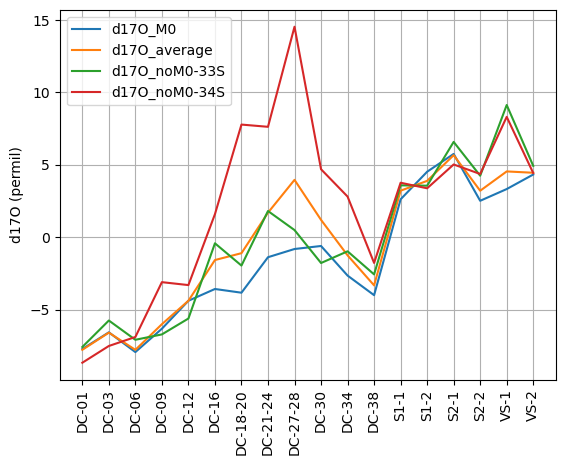

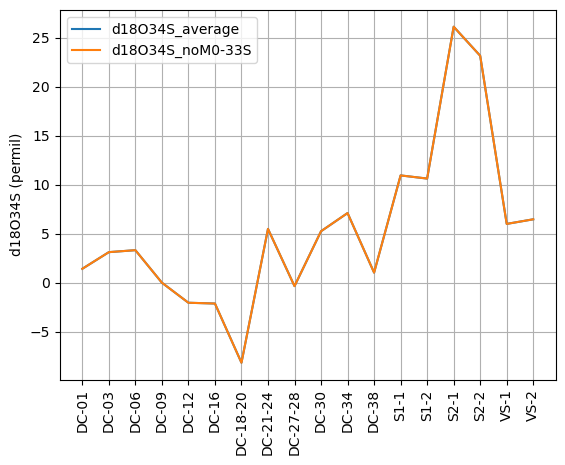

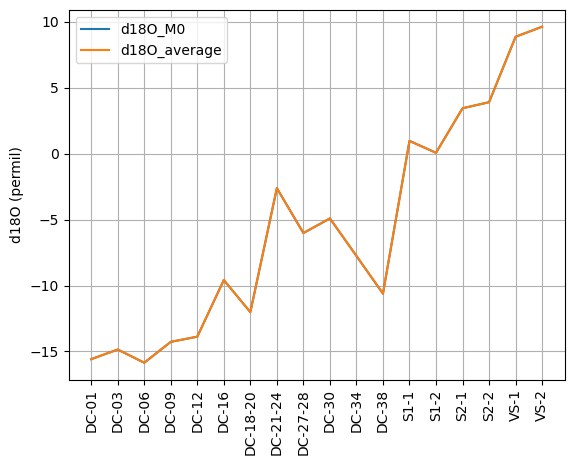

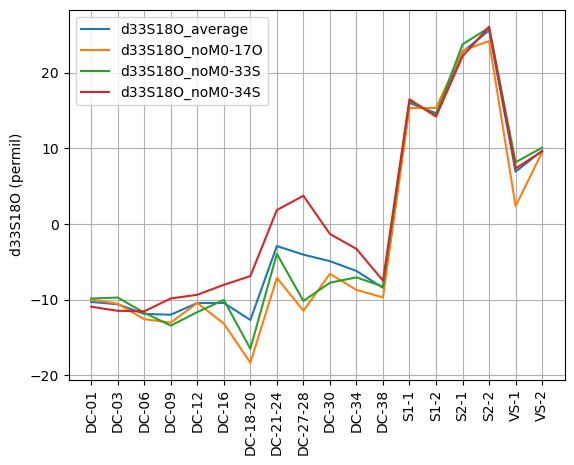

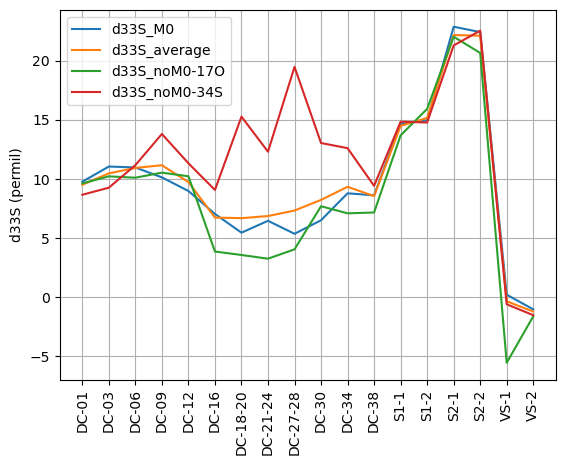

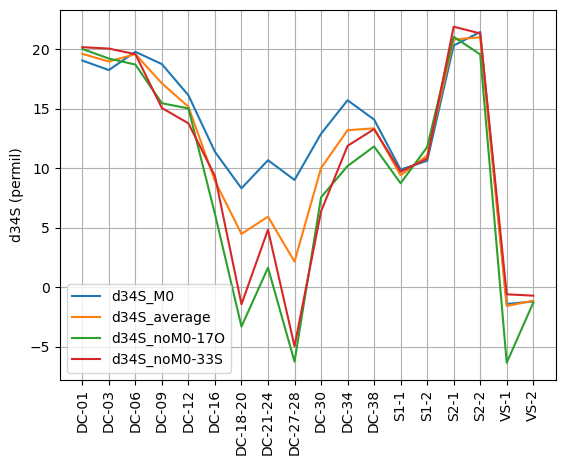

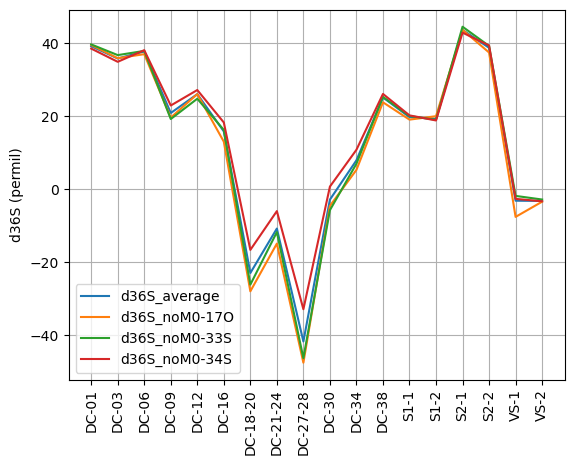

In [37]:
# True = plots only samples, False = plots standards also
if False:
    data_plot = small_deltas.loc[[row for row in small_deltas.index if not row.startswith(('USGS','S1','S2','VS','NICO'))]]
else:
    data_plot=small_deltas

# plots for each little delta
for delta in pd.Series([col.split('_')[0] for col in data_plot.columns]).unique():
    fig,ax=plt.subplots()
    cols = [col for col in data_plot.columns if col.startswith(delta+'_') and not col.endswith('_err')]
    ax.plot(data_plot[cols]*1e3,label=cols)
    ax.set_ylabel(delta+' (permil)')
    ax.legend()
    ax.grid()
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [38]:
# derived capital Deltas

def calc_D17O(d17data,d17err, d18data,d18err):
    val = d17data - 0.52*d18data
    err = np.sqrt(d17err**2+(0.52*d18err)**2)
    return pd.DataFrame({'D17O':val,'D17O_err':err})

def calc_D33S(d33data,d33err, d34data,d34err):
    val = d33data - 0.515*d34data
    err = np.sqrt(d33err**2+(0.515*d34err)**2)
    return pd.DataFrame({'D33S':val,'D33S_err':err})
    
def calc_D36S(d36data,d36err,d34data,d34err):
    val = d36data - 1.96*d34data
    err = np.sqrt(d36err**2+(1.96*d34err)**2)
    return pd.DataFrame({'D36S':val,'D36S_err':err})

def calc_D34S18O(d1834data,d1834err, d34data,d34err, d18data,d18err):
    val = (1+d1834data)/((1+d34data)*(1+d18data)) -1
    err = np.sqrt(d1834err**2+d34err**2+d18err**2)
    return pd.DataFrame({'D34S18O':val,'D34S18O_err':err})

def calc_D18O18O(d1818data,d1818err, d18data,d18err):
    val = (1+d1818data)/((1+d18data)*(1+d18data)) -1
    err = np.sqrt(d1818err**2+(2*d18err)**2)
    return pd.DataFrame({'D18O18O':val,'D18O18O_err':err})

def calc_D33S18O(d3318data,d3318err, d33data,d33err, d18data,d18err):
    val = (1+d3318data)/((1+d33data)*(1+d18data)) -1
    err = np.sqrt(d3318err**2+d33err**2+d18err**2)
    return pd.DataFrame({'D33S18O':val,'D33S18O_err':err})


derived_deltas=pd.DataFrame()


# derived deltas calculations

if data_type=='M0+noM0':
    #### For no-M0 and M0 data - sulphate
    derived_deltas[['D17O','D17O_err']] = calc_D17O(small_deltas['d17O_average'],small_deltas['d17O_average_err'],
                                                    small_deltas['d18O_average'],small_deltas['d18O_average_err'])
    derived_deltas[['D33S','D33S_err']] = calc_D33S(small_deltas['d33S_average'],small_deltas['d33S_average_err'],
                                                    small_deltas['d34S_average'],small_deltas['d34S_average_err'])
    derived_deltas[['D36S','D36S_err']] = calc_D36S(small_deltas['d36S_average'],small_deltas['d36S_average_err'],
                                                    small_deltas['d34S_average'],small_deltas['d34S_average_err'])

    derived_deltas[['D34S18O','D34S18O_err']] = calc_D34S18O(small_deltas['d18O34S_average'],small_deltas['d18O34S_average_err'],
                                                             small_deltas['d34S_average'],small_deltas['d34S_average_err'],
                                                             small_deltas['d18O_average'],small_deltas['d18O_average_err'])

    # derived_deltas[['D18O18O','D18O18O_err']] = calc_D18O18O(small_deltas['d18O18O_average'],small_deltas['d18O18O_average_err'],
    #                                                          small_deltas['d18O_average'],small_deltas['d18O_average_err'])

    derived_deltas[['D33S18O','D33S18O_err']] = calc_D33S18O(small_deltas['d33S18O_average'],small_deltas['d33S18O_average_err'],
                                                             small_deltas['d33S_average'],small_deltas['d33S_average_err'],
                                                             small_deltas['d18O_average'],small_deltas['d18O_average_err'])


### ok for all data types: M0-only calculations 
# M0-only D17O
derived_deltas[['D17O_M0','D17O_M0_err']] = calc_D17O(small_deltas['d17O_M0'],small_deltas['d17O_M0_err'],
                                                small_deltas['d18O_M0'],small_deltas['d18O_M0_err'])
 # M0-only D33S
derived_deltas[['D33S_M0','D33S_M0_err']] = calc_D33S(small_deltas['d33S_M0'],small_deltas['d33S_M0_err'],
                                                small_deltas['d34S_M0'],small_deltas['d34S_M0_err'])

# display
derived_deltas*1e3

,D17O,D17O_err,D33S,D33S_err,D36S,D36S_err,D34S18O,D34S18O_err,D33S18O,D33S18O_err,D17O_M0,D17O_M0_err,D33S_M0,D33S_M0_err
DC-01,0.3,1.2,-0.6,1.6,0.7,4.1,-2.3,4.9,-4.1,3.6,0.4,1.3,-0.0,2.0
DC-03,1.1,1.2,0.7,1.5,-1.4,3.8,-0.7,4.4,-6.1,3.1,1.1,1.3,1.6,1.9
DC-06,0.5,1.3,0.8,1.5,-0.7,3.8,-0.1,4.8,-6.8,3.4,0.3,1.4,0.8,1.9
DC-09,1.4,1.2,2.3,1.5,-12.7,3.2,-2.6,4.5,-8.7,3.4,1.1,1.3,0.5,1.9
DC-12,2.8,1.3,1.9,1.4,-3.7,3.4,-3.1,4.0,-6.2,3.0,2.8,1.4,0.7,1.9
DC-16,3.4,1.1,2.1,1.2,-1.7,2.8,-1.4,3.6,-7.5,2.5,1.4,1.4,1.2,1.7
DC-18-20,5.1,1.2,4.4,1.4,-31.7,3.3,-0.6,4.1,-7.3,2.4,2.4,1.4,1.2,1.6
DC-21-24,3.1,1.1,3.8,1.4,-22.4,2.8,2.2,3.3,-7.1,1.8,-0.0,1.4,1.0,1.9
DC-27-28,7.1,1.1,6.2,1.5,-45.9,3.7,3.6,3.7,-5.3,2.0,2.3,1.4,0.7,1.9
DC-30,3.7,1.1,3.1,1.3,-22.5,2.7,0.2,3.1,-8.2,2.3,1.9,1.7,-0.1,1.7


In [39]:
# compile averaged small deltas and derived deltas into a single dataframe
data_summary = pd.DataFrame()

# select which small deltas to report in summary dataframe
small_deltas_to_report = ['d15N','d34S','d18O']

#### for no-M0 + M0 data - uses average column
if data_type=='M0+noM0':
    small_d_cols = [col for col in small_deltas.columns if (col.endswith(('_average','_average_err'))) & (col.startswith(tuple(( d+'_' for d in small_deltas_to_report))))]
    derived_D_cols = derived_deltas.columns.tolist()
    data_summary[small_d_cols]=small_deltas[small_d_cols]
    data_summary[derived_D_cols]=derived_deltas[derived_D_cols]

#### for all data type: report M0 deltas
small_d_cols = [col for col in small_deltas.columns if (col.endswith(('_M0','_M0_err'))) & (col.startswith(tuple(( d+'_' for d in small_deltas_to_report))))]
derived_D_cols = derived_deltas.columns.tolist()
data_summary[small_d_cols]=small_deltas[small_d_cols]
data_summary[derived_D_cols]=derived_deltas[derived_D_cols]

# sort columns
data_summary = data_summary[sorted(data_summary.columns,key=str.casefold)]

# display
print('Reported columns:',data_summary.columns,'\n')
data_summary.head()*1e3

Reported columns: Index(['D17O', 'D17O_err', 'D17O_M0', 'D17O_M0_err', 'd18O_average',
       'd18O_average_err', 'd18O_M0', 'd18O_M0_err', 'D33S', 'D33S18O',
       'D33S18O_err', 'D33S_err', 'D33S_M0', 'D33S_M0_err', 'D34S18O',
       'D34S18O_err', 'd34S_average', 'd34S_average_err', 'd34S_M0',
       'd34S_M0_err', 'D36S', 'D36S_err'],
      dtype='object') 



,D17O,D17O_err,D17O_M0,D17O_M0_err,d18O_average,d18O_average_err,d18O_M0,d18O_M0_err,D33S,D33S18O,...,D33S_M0,D33S_M0_err,D34S18O,D34S18O_err,d34S_average,d34S_average_err,d34S_M0,d34S_M0_err,D36S,D36S_err
DC-01,0.3,1.2,0.4,1.3,-15.6,0.7,-15.6,0.7,-0.6,-4.1,...,-0.0,2.0,-2.3,4.9,19.6,1.5,19.1,2.2,0.7,4.1
DC-03,1.1,1.2,1.1,1.3,-14.9,0.8,-14.9,0.8,0.7,-6.1,...,1.6,1.9,-0.7,4.4,19.0,1.3,18.3,1.8,-1.4,3.8
DC-06,0.5,1.3,0.3,1.4,-15.9,1.2,-15.9,1.2,0.8,-6.8,...,0.8,1.9,-0.1,4.8,19.6,1.3,19.8,1.7,-0.7,3.8
DC-09,1.4,1.2,1.1,1.3,-14.3,0.7,-14.3,0.7,2.3,-8.7,...,0.5,1.9,-2.6,4.5,17.1,1.3,18.8,1.8,-12.7,3.2
DC-12,2.8,1.3,2.8,1.4,-13.9,0.8,-13.9,0.8,1.9,-6.2,...,0.7,1.9,-3.1,4.0,15.2,1.3,16.1,1.9,-3.7,3.4


/var/folders/rr/bz6rnlcn09b6b2ttxx8h8x5m0000gn/T/ipykernel_59987/782811610.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


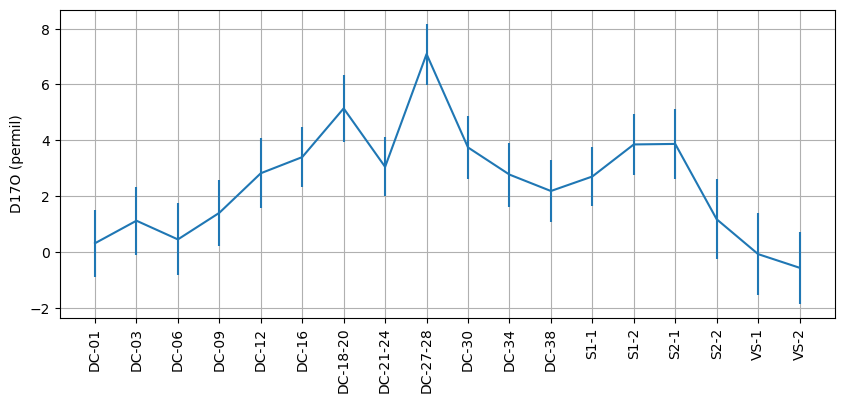

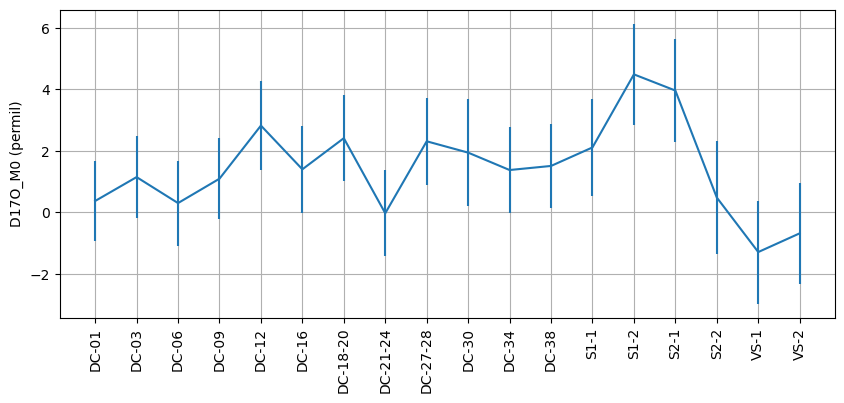

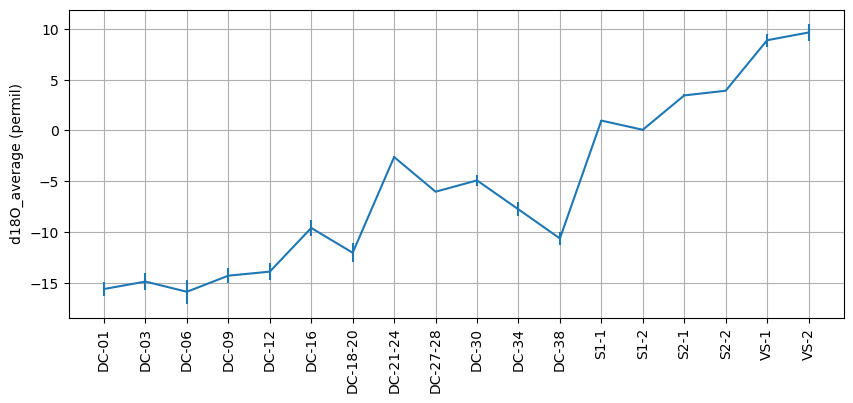

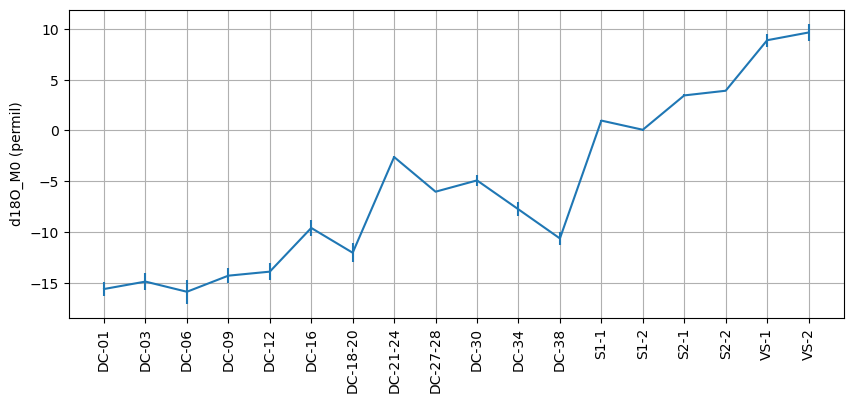

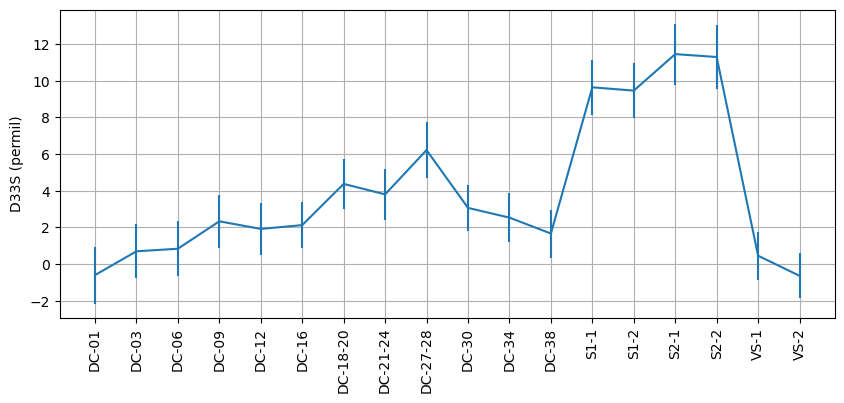

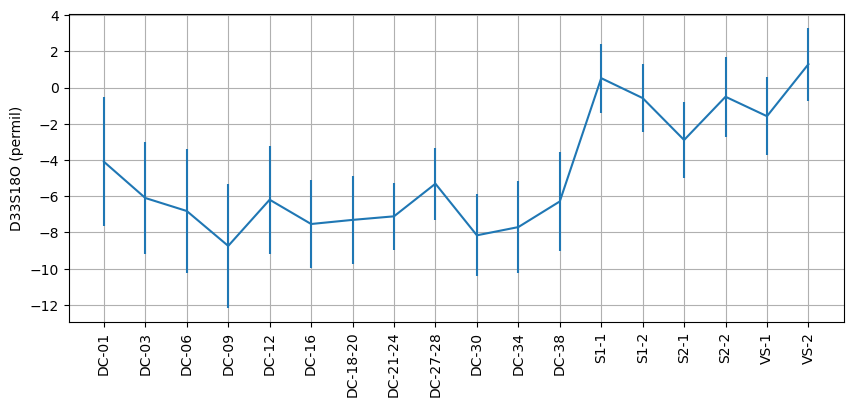

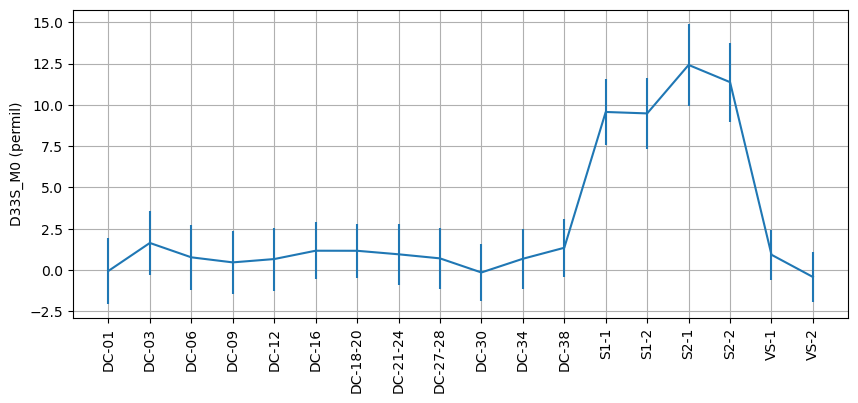

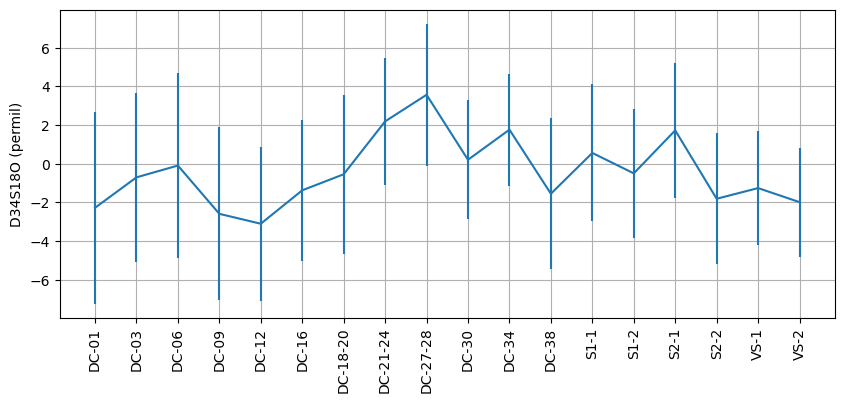

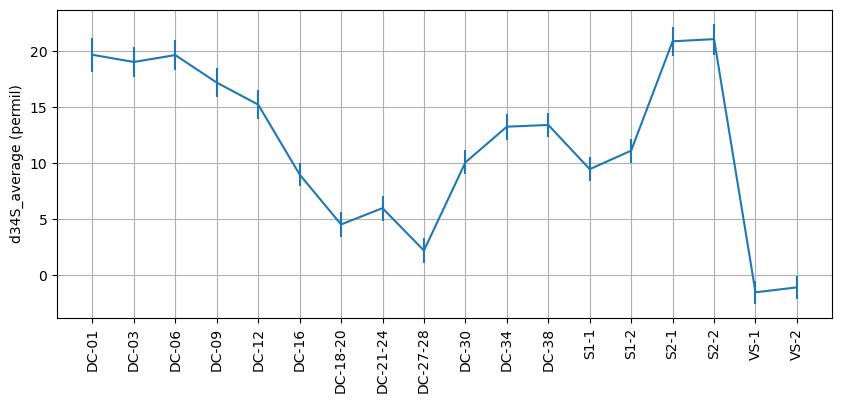

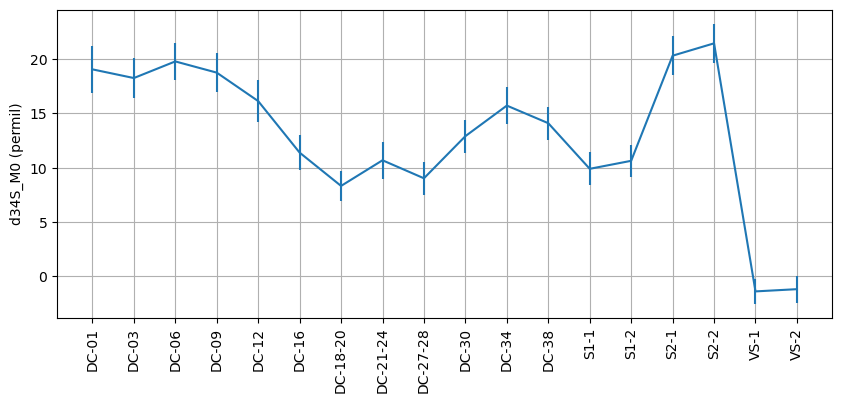

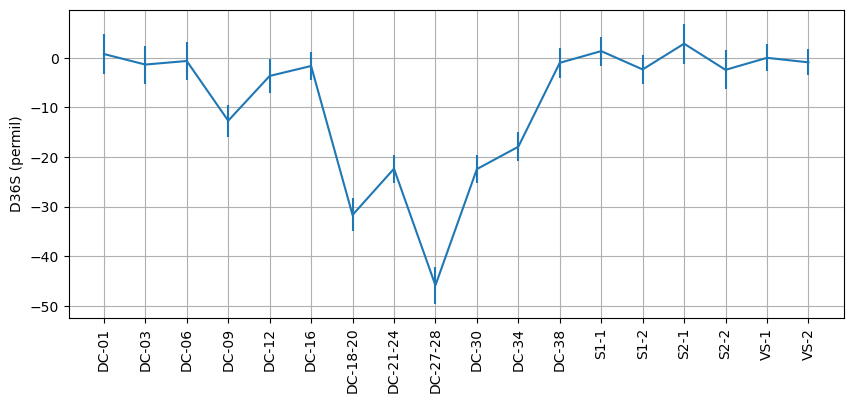

In [41]:
# plots of final summary deltas

# True = plots only samples, False = plots standards also
if False:
    data_plot = data_summary.loc[[row for row in data_summary.index if not row.startswith(('USGS','S1','S2','VS','NICO'))]]
else:
    data_plot = data_summary
    
cols = pd.Series([col for col in data_plot.columns if not col.endswith('_err')]).unique()
    
# plots for each delta
for delta in cols:
    fig,ax=plt.subplots(figsize=[10,4])
    ax.errorbar(x=data_plot.index, y=data_plot[delta]*1e3,
               yerr=data_plot[delta+'_err']*1e3)
    ax.set_ylabel(delta+' (permil)')
    ax.grid()
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [42]:
output_file = os.getcwd().split('/')[-1]+'_results_calibrated_'+current_date_string+'.xlsx'

to_save = {'Small deltas uncalibrated':samples,
           'Small deltas calibrated':samples_cal,
           'Small deltas M0 calculations':small_deltas,
           'Derived deltas':derived_deltas,
           'Reported deltas':data_summary}

for sheet_name, df in to_save.items():
    # Check if the file exists
    if not os.path.exists(os.path.join(output_file)):
        # If the file doesn't exist, create a new ExcelWriter object without mode='a'
        with pd.ExcelWriter(os.path.join(output_file), engine='openpyxl') as writer:
            # Write the DataFrame to a new sheet with the specified sheet name
            df.to_excel(writer, sheet_name=sheet_name, index=True)
            print('Excel file created:',os.path.join(output_file),'\nNew sheet added to',output_file,':',sheet_name)
    else:
        # If the file exists, create an ExcelWriter object with mode='a' to append to the existing file
        with pd.ExcelWriter(os.path.join(output_file), engine='openpyxl', mode='a',if_sheet_exists='replace') as writer:
            # Write the DataFrame to a new sheet with the specified sheet name
            df.to_excel(writer, sheet_name=sheet_name, index=True)
            print('New sheet added to',output_file,':',sheet_name)

New sheet added to 2501_DC-2_HSO4_results_calibrated_2025-02-11.xlsx : Small deltas uncalibrated
New sheet added to 2501_DC-2_HSO4_results_calibrated_2025-02-11.xlsx : Small deltas calibrated
New sheet added to 2501_DC-2_HSO4_results_calibrated_2025-02-11.xlsx : Small deltas M0 calculations
New sheet added to 2501_DC-2_HSO4_results_calibrated_2025-02-11.xlsx : Derived deltas
New sheet added to 2501_DC-2_HSO4_results_calibrated_2025-02-11.xlsx : Reported deltas
